In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
class Creator():
    def factory_method(self):
        pass
    def get_charge(self) -> float:
        particle = self.factory_method()
        result = particle.charge()
        return result
    def get_mass(self) -> float:
        particle = self.factory_method()
        result = particle.mass()
        return result
class Particle():
    def charge(self) -> float:
        pass
    def mass(self) -> float:
        pass
class Electron(Creator):
    def factory_method(self) -> Particle:
        return electron()
class Proton(Creator):
    def factory_method(self) -> Particle:
        return proton()
class Photon(Creator):
    def factory_method(self) -> Particle:
        return photon()
class electron(Particle):
    def charge(self) -> float:
        return -1.602e-19
    def mass(self) -> float:
        return 9.109e-31
class proton(Particle):
    def charge(self) -> float:
        return 1.602e-19
    def mass(self) -> float:
        return 1.673e-27
class photon(Particle):
    def charge(self) -> float:
        return 0
    def mass(self) -> float:
        return 1

In [11]:
def code(induction, velocity, angle, creator: Creator) -> None:
    charge = creator.get_charge()
    mass = creator.get_mass()
    x_coordinate = 0
    y_coordinate = 0
    z_coordinate = 0
    t = 0
    t0 = 0.00000000001
    angle_horizontal = 0
    x_array = np.zeros(1000000)
    y_array = np.zeros(1000000)
    z_array = np.zeros(1000000)
    i = 0
    while(1):
        acceleration_x_coordinate = charge / mass * induction * velocity * math.sin(angle_horizontal) * (-1)
        acceleration_y_coordinate = charge / mass * induction * velocity * math.cos(angle_horizontal)
        acceleration = math.sqrt(acceleration_x_coordinate * acceleration_x_coordinate + acceleration_y_coordinate * acceleration_y_coordinate)
        x_coordinate = x_coordinate + velocity * math.sin(angle) * math.cos(angle_horizontal) * t0 + acceleration_x_coordinate * t0 * t0 / 2
        y_coordinate = y_coordinate + velocity * math.sin(angle) * math.sin(angle_horizontal) * t0 + acceleration_y_coordinate * t0 * t0 / 2
        z_coordinate = z_coordinate + (velocity * math.cos(angle) * t0)
        angle_shift = math.atan(acceleration * t0 / velocity * math.sin(angle))
        angle_horizontal = angle_horizontal + angle_shift * np.sign(charge)
        x_array[i] = x_coordinate
        y_array[i] = y_coordinate
        z_array[i] = z_coordinate
        i = i + 1
        t = t + t0
        if(t >= 0.0000001):
            break
    plt.figure(1)
    plt.scatter(x_array, y_array, s = 0.5)
    plt.xlabel("Координата x")
    plt.ylabel("Координата y")
    plt.figure(2)
    plt.scatter(z_array, y_array, s = 0.5)
    plt.xlabel("Координата z")
    plt.ylabel("Координата y")
    plt.show()

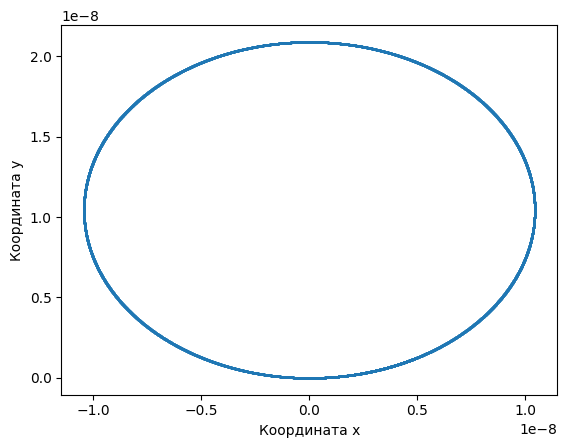

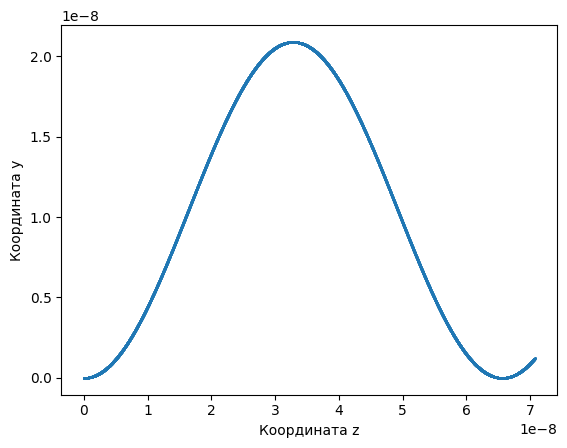

In [12]:
particle_type = input("Вкажіть тип частинки: 1 для електрона, 2 для протона та 3 для фотона")
induction = float(input("Вкажіть значення магнітної індукції поля у Тл"))
velocity = float(input("Вкажіть значення швидкості частинки у м/с"))
angle = float(input("Вкажіть кут між вектором швидкості частинки та напрямком силових ліній магнітного поля у градусах"))
angle = angle / 360 * 2 * math.pi
if(particle_type == '1'):
    code(induction, velocity, angle, Electron())
elif(particle_type == '2'):
    code(induction, velocity, angle, Proton())
elif(particle_type == '3'):
    code(induction, velocity, angle, Photon())
else:
    print("Error!")

Напрямок осі z обраний так, що він збігається з напрямком індукції магнітного поля.
Напрямок осі y обраний так, що проекція початкової швидкості частинки на цю вісь дорівнює 0.
Рух частинки починається з точки (0;0;0).
Координати на графіках вказують відстань у метрах.